In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data
df = pd.read_csv("Social_Network_Ads.csv")
print("Data imported")

Data imported


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X= df.iloc[:,[2,3]].values
X.shape

(400, 2)

In [5]:
y = df.iloc[:,-1].values
y.shape

(400,)

In [6]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

print('X_train\n',X_train.shape)
print('y_train\n',y_train.shape)
print('X_test\n',X_test.shape)
print('y_test\n',y_test.shape)

X_train
 (280, 2)
y_train
 (280,)
X_test
 (120, 2)
y_test
 (120,)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
#fitting the Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[74, 10],
       [ 5, 31]], dtype=int64)

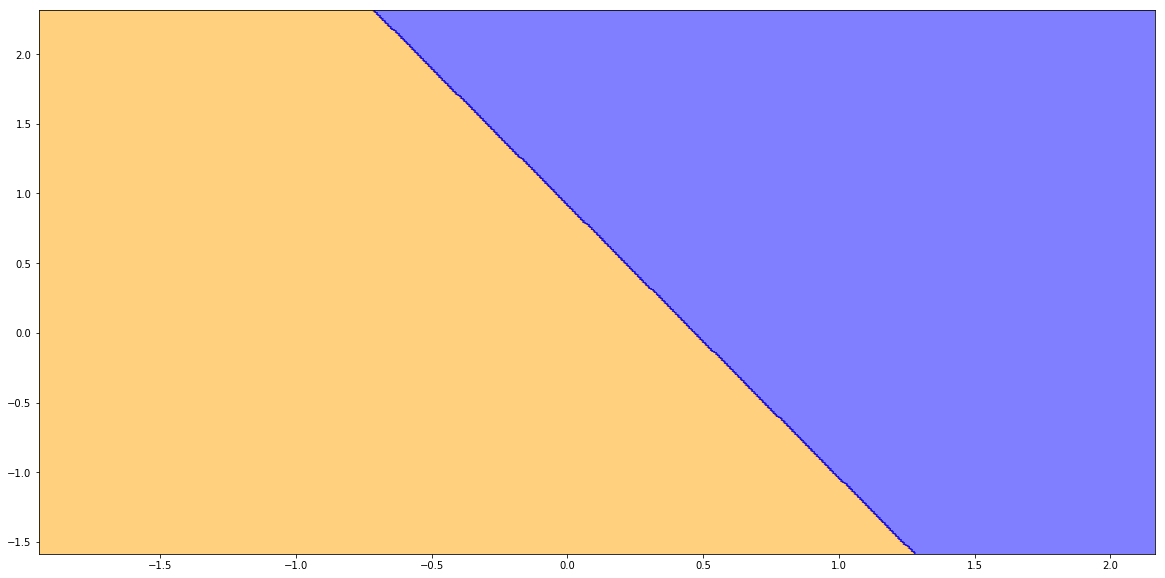

In [22]:
from matplotlib.colors import ListedColormap

plt.figure(figsize = (20,10))
X_set, y_set = X_test, y_test
 
aranged_ages = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_salaries = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))

- **aranged_ages** variable will have scaled ages of users starting from minimum age to maximum age incremented by 0.01.
- **aranged_salaries** variable will have scaled salaries of users starting from minimum salary to maximum salary incremented by 0.01.
- **np.meshgrid()** takes aranged_ages and aranged_salaries to form X1 and X2.
- **X1 and X2** are used for creating a graph which classifies all data points using logistic regression classification. It is done using plt.contourf(), method.

After this graph is plotted as below

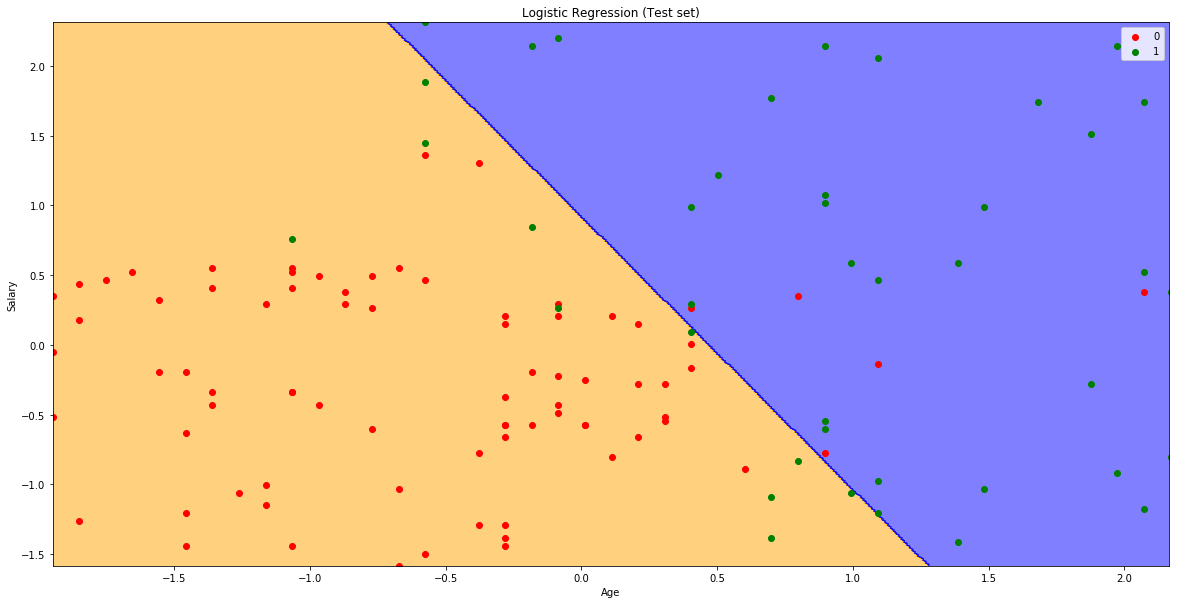

In [24]:
plt.figure(figsize = (20,10))
X_set, y_set = X_test, y_test
 
aranged_ages = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_salaries = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

- Red points denote users who did not buy the car
- Green points denote users who bought the car.

- Note the orange and blue sections in graph.
- Logistic Regression classification has classified all data points into two classes, one who will not buy the car and the one who buys it.
- Orange section denotes all users who will not buy the car
- Blue section denotes all users who will buy the car.